In [68]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Embedding
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/natural-language-processing-with-disaster-tweets/sample_submission.csv
/kaggle/input/natural-language-processing-with-disaster-tweets/train.csv
/kaggle/input/natural-language-processing-with-disaster-tweets/test.csv


# Disaster Tweets Deep Learning
---

### 1 Introduction

---
#### 1.1 Overview

There are a lot of tweets out there that exist, yet it is often about topics that happen around us. Though, sometimes there are tweets about disasters, and it would informational to see whether these tweets provide valuabel information about the world around us, even if we are not there to witness it. In the cases of disasters, there is an abundant stream of tweets that occur at once, so how can tweets specifically about real disasters be detected without knowing ahead of time, and getting confused with fake disasters? 

#### 1.2 Goal

The goal of this project is to apply deep learning via Convolutional Neural Network (CNN) modeling, as well as Recurrent Neural Network (RNN) modeling. The CNN modeling will require convolutional layers, pooling layers, and fully connected layers, while RNN will require Long Short Term Memory (LTSM) layers and dense layers  Although both will be using the Sequential approach, the difference will be in the parameters

#### 1.3 About the Data
**1.3.1 Load The Data (Train Data)**

In [25]:
# acquire the train data
train = pd.read_csv("/kaggle/input/natural-language-processing-with-disaster-tweets/train.csv")

# print out top 5 data sets from diabetes
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [26]:
# print number of columns
print("Number of Columns For Train Data:", 
      len(train.columns))

#print number of rows
print("Number of Rows For Train Data:", 
      len(train))

Number of Columns For Train Data: 5
Number of Rows For Train Data: 7613


**1.3.2 Load The Data (Test Data)**

In [27]:
# acquire the test data
test = pd.read_csv("/kaggle/input/natural-language-processing-with-disaster-tweets/test.csv")

# print out top 5 data sets from diabetes
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [28]:
# print number of columns
print("Number of Columns For Test Data:", 
      len(test.columns))

#print number of rows
print("Number of Rows For Test Data:", 
      len(test))

Number of Columns For Test Data: 4
Number of Rows For Test Data: 3263


**1.3.2 Data Source and Citation**

**_Citation:_**

Addison Howard, devrishi, Phil Culliton, Yufeng Guo. (2019). Natural Language Processing with Disaster Tweets. Kaggle. https://kaggle.com/competitions/nlp-getting-started

The dataset that was used is called the "Natural Language Processing with Disaster Tweets" from Kaggle. It can be found [here](https://kaggle.com/competitions/nlp-getting-started) page, which is cited in the link above. In this data, it tweets with realted to and not related to data in the train dataset, as well as a test set with just the tweets. 

**1.3.3 Data Description**

This data overall provides tweets that were identified as either:
- **Real Disaster = 1:** When a tweet was about a real disaster
- **Not Real Disaster = 0:** When a tweet was not about a real disaster

The train data consists of is 7613 rows and 5 columns. Here are all the features of this data and what they are:

This data consists of tweets from Twitter. The data for train data consists of the columns:
- `id`: The identification of the Tweet
- `keyword`: Specific word to thats key to data
- `location`: Location from where the tweet was sent
- `text`: The Tweet itself
- `target`: Whether the tweet was about a real disaster or not. (1 or 0)

Meanwhile, the test data consists of is 3263 rows and 4 columns. They have the same columns as the train data, except for target. This is because the model is supposed to predict these models

These datasets will be used to help deep learn the identification of a tumor.


### 2 Data Cleaning

--- 
#### 2.1 Data Exploration

The first part of the exploratory data analysis, is to determine what kind of data is being used in this investigation. It is also important to evaluate any important parts of the data that may need to be processed. For this first part, understanding what the data has and whether there are null values should be evaluated. 

**2.1.1: Types of Usable Data**

In [29]:
# print information on the datasets
print("Disaster Tweets Information")
print(train.info(), "\n")

Disaster Tweets Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None 



In [30]:
# print number sum of null values present in each column
print("Disaster Tweets Information: Null Values")
print(train.isnull().sum(), "\n")

Disaster Tweets Information: Null Values
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64 



**Observations:** Given that there are many null values in keyword and location, it is probably best to remove it, especially since it will not contribute to what is being investigated in this analysis.

**2.1.2 Removing Null Values**

Before further evaluation, it is best to ensure that there are no null values present in the data set. This will ensure there are no errors in the visualation, as well as in the prediction.

In [31]:
# remove "keyword" and "location" from the train and test data
train_1 = train.drop(columns = ["keyword", "location"])
train_1.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [32]:
test_1 = test.drop(columns = ["keyword", "location"])
test_1.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


**2.1.3: Understand the Distribution of Data Points**




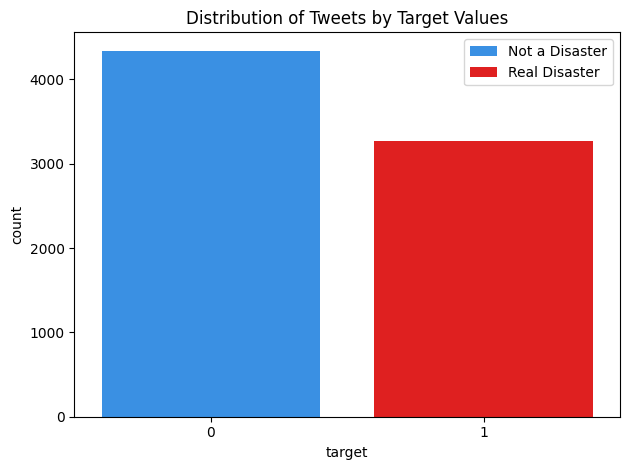

In [33]:
# create count plot to demonstrate structure of the tweets train dataset
# use sns to plot count plot
sns.countplot(x = "target", hue = "target", 
              data = train_1, 
              palette = ["dodgerblue", "r"],
              dodge = False) # center the bars
plt.title(f"Distribution of Tweets by Target Values")
plt.legend(["Not a Disaster", "Real Disaster"])
plt.tight_layout()
plt.show()

**Observations:** There are more tweets that were not about a real disaster. This evident because there are visually about ~4500 tweets that were not about a real disaster, while there was about a little more than 3000 tweets about a real disaster.

Train Data Tweet Lengths


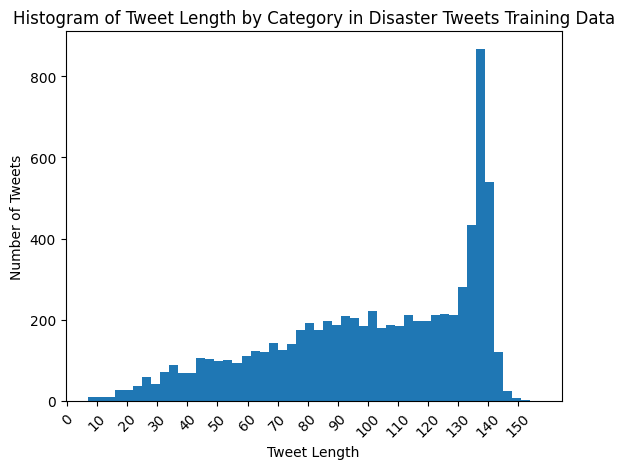

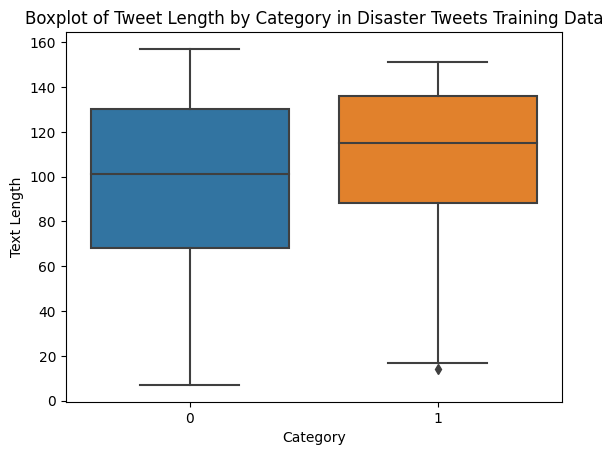

In [47]:
print("Train Data Tweet Lengths")
# acquire length of each article under "text" column
tweet_len_tn = train_1["text"].apply(len)

# use a histogram to determine around what part of the data
# would be ideal to simplify the prediction model
plt.hist(x = tweet_len_tn,
         bins = 50)
plt.title("Histogram of Tweet Length by Category in Disaster Tweets Training Data")
plt.xlabel("Tweet Length")
plt.ylabel("Number of Tweets")
max_tl = tweet_len_tn.max()
xticks = np.arange(0, max_tl,
                   10)
plt.xticks(ticks = xticks,
           rotation = 45)
plt.show()

# use a boxplot to show what text lengths are ideally
# in range
sns.boxplot(data = train_1,
            x = "target", 
            y = tweet_len_tn)
plt.title("Boxplot of Tweet Length by Category in Disaster Tweets Training Data")
plt.xlabel("Category")
plt.ylabel("Text Length")
plt.xticks()
plt.show()

Test Data Tweet Lengths


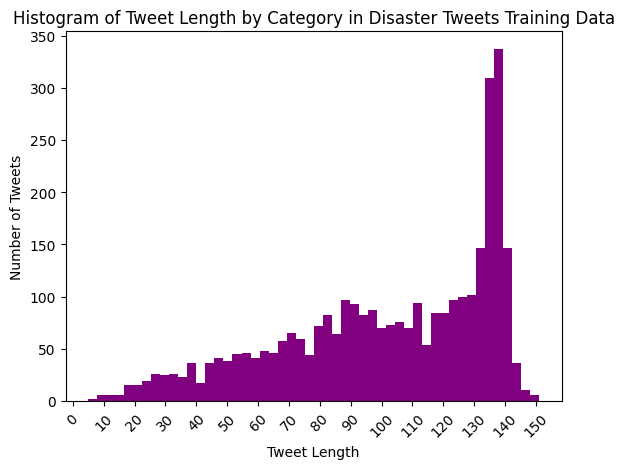

In [48]:
print("Test Data Tweet Lengths")
# acquire length of each article under "text" column
tweet_len_tt = test_1["text"].apply(len)

# use a histogram to determine around what part of the data
# would be ideal to simplify the prediction model
plt.hist(x = tweet_len_tt,
         bins = 50,
         color = "purple")
plt.title("Histogram of Tweet Length by Category in Disaster Tweets Training Data")
plt.xlabel("Tweet Length")
plt.ylabel("Number of Tweets")
max_tl = tweet_len_tt.max()
xticks = np.arange(0, max_tl,
                   10)
plt.xticks(ticks = xticks,
           rotation = 45)
plt.show()

**Observations:** From the looks of all the data, the tweets are likely hitting a max word length 150, so the text are not going to ever exceed 150 words. Furthermore, it looks like real disasters had the tendency to have longer word counts. 

There is no need to adjust the data any further, so it is time to do data pre-processing.

### 3 Data Pre-Processing 

---

#### 3.1 Tokenization

Before proceeding with text data, it is important to keep in mind that text cannot be understood from a machine from looking at it. It needs to be able to optimize a way to recognize importance for words, as well as pinpoint context based on key words. The approach that needs to take place is tokenization. This will involve assign a value to each word, as well as ensure stop words (e.g. "the", "and" etc.) and punctuation are excluded. To better understand tokenization via tf.keras, I used this [site](https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html) to understand.

In [62]:
# use tokenization and removing stopwords and punctuation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_1["text"])
X = tokenizer.texts_to_sequences(train_1["text"])

# create tokenized X values 
X = pad_sequences(X, maxlen = 150)  # since the max word count for tweet is 150

# create target labels
y = train_1["target"]

X

array([[    0,     0,     0, ...,  4634,    89,    40],
       [    0,     0,     0, ...,  6954,  6955,  1404],
       [    0,     0,     0, ...,  1405,    24,  1106],
       ...,
       [    0,     0,     0, ...,     1,     2,  6913],
       [    0,     0,     0, ...,   131,  2048,   316],
       [    0,     0,     0, ...,     1,     2, 22700]], dtype=int32)

In [76]:
# use tokenization and removing stopwords and punctuation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test_1["text"])
X_test = tokenizer.texts_to_sequences(test_1["text"])

# create tokenized X values 
X_test = pad_sequences(X_test, maxlen = 150)  # since the max word count for tweet is 150

X_test

array([[    0,     0,     0, ...,   985,   135,   100],
       [    0,     0,     0, ...,   743,   890,   429],
       [    0,     0,     0, ...,   481,   101,    43],
       ...,
       [    0,     0,     0, ...,     1,     2, 12817],
       [    0,     0,     0, ...,     1,     2, 12818],
       [    0,     0,     0, ...,    71,   264,  2464]], dtype=int32)

#### 3.2 Convert Train Data Into Train and Validation Data

To make sure a model works correctly, validation and train data need to be made by splitting the original train data. The test size for validation should be 20% of the data

In [100]:
# split train data into train and validation sets, 20% to validation
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size = 0.2, 
                                                  random_state = 42)

### 4 Model Architecture

---

#### 4.1 Build The CNN Model
The neural network architecture needs to be identified before learning. The reason is it is the structure in which the deep learning will occur. Without model architecture, the ability to learn is non-existent. The one CNN that will be used is Sequential because it is useful for deep learning patterns from text, which in this cases is a tweet.


In [69]:
#  using tf.keras.Sequential to build CNN Model
model_cnn = Sequential([
    Embedding(input_dim = len(tokenizer.word_index) + 1, 
              output_dim = 150),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(5),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#### 4.2 Build The RNN Model
The other neural network approach is RNN. RNN is useful because its primary focus is to do language modeling. Given the context of this model, this is the more reasonable approach. However, it is good toe evaluate both regardless. RNN will also be using the sequential model for its architecture.

In [86]:
#  using tf.keras.Sequential to build RNN/LSTM Model
model_rnn = Sequential([
    Embedding(len(tokenizer.word_index)+1, 
              output_dim = 150, 
              input_length = 150),
    LSTM(50, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

### 5 Model Analysis

---

#### 5.1 Training and Validation

**5.1 Compile, Train and Validate The Model** 

Compiling is used to ensure optimization whenever errors are faced throughout the learning process. In result, this must be implemented before the learning process can begin. The things to accomodate for are optimization appraoch, loss function, and evaluation metrics. The one selected in this model are:
- `adam`: Picked due to it's balance of both AdaGrad and RMS Prop
- `binary_crossentropy`: Picked due to the use of binary categories of 0 and 1 (No Tumor and Tumor)
- `accuracy`: Picked because it ensures whether the model can predict well or not, compared to original labels.

In [72]:
# compile the cnn model
model_cnn.compile(optimizer = "adam", 
                  loss = "binary_crossentropy", 
                  metrics = ["accuracy"])

# train the model, this will provide the history of the data; to plot later
hist_cnn = model_cnn.fit(X_train, y_train, 
                         batch_size = 128, epochs = 10, 
                         validation_data = (X_val, y_val))

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.5659 - loss: 0.6828 - val_accuracy: 0.7177 - val_loss: 0.6153
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.7718 - loss: 0.5188 - val_accuracy: 0.7991 - val_loss: 0.4603
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9270 - loss: 0.2159 - val_accuracy: 0.7728 - val_loss: 0.5452
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9767 - loss: 0.0920 - val_accuracy: 0.7774 - val_loss: 0.6213
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9861 - loss: 0.0554 - val_accuracy: 0.7715 - val_loss: 0.6729
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9881 - loss: 0.0446 - val_accuracy: 0.7774 - val_loss: 0.7127
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9906 - loss: 0.0432 - val_accuracy: 0.7617 - val_loss: 0.7416
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9911 - loss: 0.0328 - val_accuracy: 0.7741 - v

In [87]:
# compile the cnn model
model_rnn.compile(optimizer = "adam", 
                  loss = "binary_crossentropy", 
                  metrics = ["accuracy"])

# train the model, this will provide the history of the data; to plot later
hist_rnn = model_cnn.fit(X_train, y_train, 
                         batch_size = 128, epochs = 10, 
                         validation_data = (X_val, y_val))

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9922 - loss: 0.0152 - val_accuracy: 0.7728 - val_loss: 0.8686
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9910 - loss: 0.0163 - val_accuracy: 0.7748 - val_loss: 0.8556
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9903 - loss: 0.0186 - val_accuracy: 0.7748 - val_loss: 0.8400
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9899 - loss: 0.0160 - val_accuracy: 0.7807 - val_loss: 0.8775
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9931 - loss: 0.0134 - val_accuracy: 0.7663 - val_loss: 0.9278
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9936 - loss: 0.0147 - val_accuracy: 0.7814 - val_loss: 0.9219
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9923 - loss: 0.0159 - val_accuracy: 0.7669 - val_loss: 0.9393
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9917 - loss: 0.0152 - val_accuracy: 0.7649 - v

#### 5.2 Predict the Model

**5.2.1: Predictions** 

In [77]:
# predictions on test set
pred_cnn = model_cnn.predict(X_test)
pred_cnn

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.99821204],
       [0.13630576],
       [0.99722075],
       ...,
       [0.5250771 ],
       [0.99980354],
       [0.77206653]], dtype=float32)

In [88]:
# predictions on test set
pred_rnn = model_rnn.predict(X_test)
pred_rnn

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


array([[0.49795425],
       [0.5033112 ],
       [0.4974051 ],
       ...,
       [0.5001573 ],
       [0.4970032 ],
       [0.5004518 ]], dtype=float32)

### 5.3 Training and Validation Visualizations

**5.3.1 Training and Validation Accuracy Plot for CNN**

Let's check to make sure the model's accuracy increases as it should.

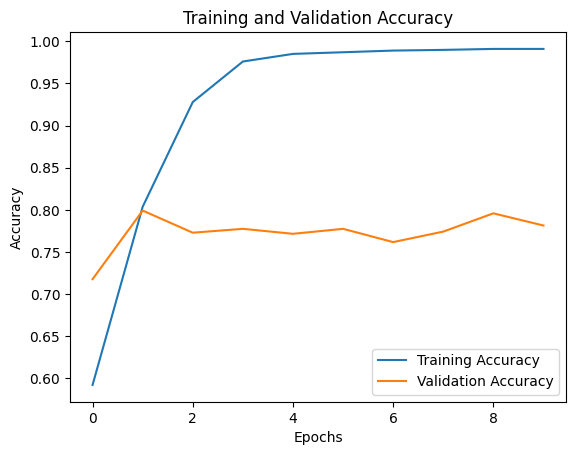

In [79]:
# plot training and validation accuracy for CNN Model
plt.plot(hist_cnn.history["accuracy"], label = "Training Accuracy")
plt.plot(hist_cnn.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**5.3.2 Training and Validation Loss Plot**

Let's check to make sure the model's loss is decreasing over time or not.

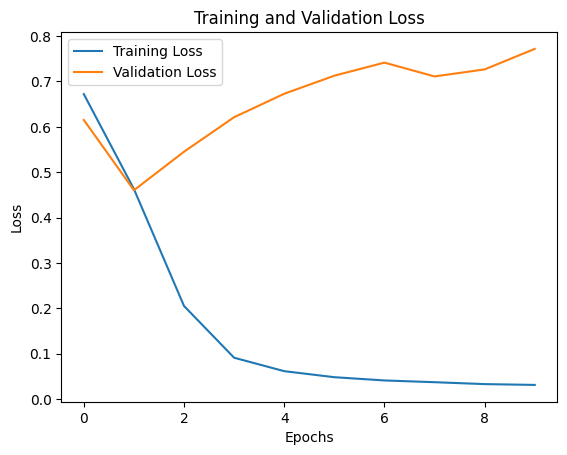

In [80]:
# lot training and validation loss for CNN model
plt.plot(hist_cnn.history["loss"], 
         label = "Training Loss")
plt.plot(hist_cnn.history["val_loss"], 
         label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Observations**: Based on accuracy plot, it is evident the CNN model was not really learning that great because the accuracy remained constant at 0.8. As for the loss plot, it starts off okay at first, because of an initial downward trend, but then eventually it pops back up. Based on this, it is possible that the CNN model overfitted. This is because accuracy should always go up overtime if it is learning, but since it is not, the model is not properly learning. As for the loss plot, given that there is no continual loss over time, it means the optimization for this model is not the best. 

**5.3.3 Training and Validation Accuracy Plot for RNN**

Let's check to make sure the model's accuracy increases as it should.

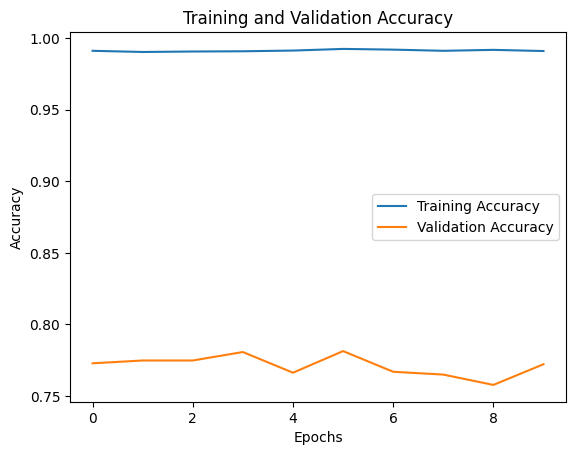

In [91]:
# plot training and validation accuracy for CNN Model
plt.plot(hist_rnn.history["accuracy"], label = "Training Accuracy")
plt.plot(hist_rnn.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**5.3.4 Training and Validation Loss Plot**

Let's check to make sure the model's loss is decreasing over time or not.

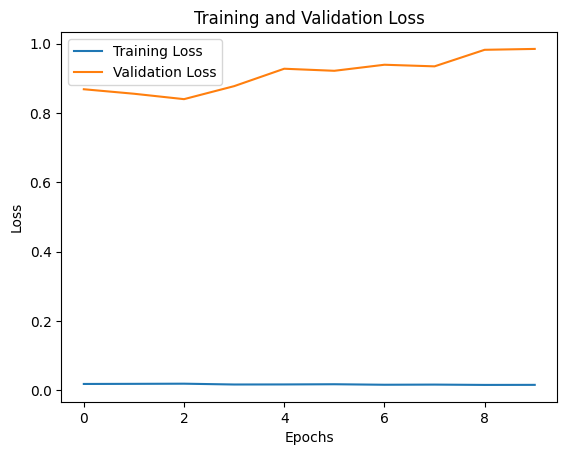

In [92]:
# lot training and validation loss for CNN model
plt.plot(hist_rnn.history["loss"], 
         label = "Training Loss")
plt.plot(hist_rnn.history["val_loss"], 
         label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Observations**: Based on both the loss and accuracy plots, it is evident the RNN model was not so great either. Given both plots found training loss and accuracy values really constant and low; whereas validation accuracy loss high and constant, this suggests the model itself is not really learning anything from the data, even training data, to properly predict test. This means this model is just not ideal.

Despite changing parameters and adding more layers, there is no luck with this model.

#### 5.4 Kaggle Submission

Based on the evaluation of the validation vs train models for accuracy and loss, it is evident only cnn is somewhat a useable model. In result, it is best to use CNN that to confirm in kaggle, but for fun, RNN will be submitted as well.

**5.4.1 Show expected .csv**

This is how the data must look like for the Kaggle Submission.

In [108]:
# acquire the test data
samp_sub = pd.read_csv("/kaggle/input/natural-language-processing-with-disaster-tweets/sample_submission.csv")

# print out top 5 data sets from diabetes
samp_sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


**5.4.2 Store Prediction Output As Dataframe in .csv for CNN**

This step is to store the CNN data for Kaggle Submission.

In [109]:
# create a csv storing the results of the prediction for score
# create a new DataFrame with 'id' column from test_df
cnn_sub = pd.DataFrame(test_1["id"])

# assign the predictions to respective id's
cnn_sub["target"] = (pred_cnn > 0.5).astype(int)

# save df as .csv
cnn_sub.to_csv("submission_cnn.csv", 
                     index=False)

# display the 5 rows to make sure it is correct
cnn_sub.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


**5.4.3 Store Prediction Output As Dataframe in .csv for RNN**

This step is to store the RNN data for Kaggle Submission.

In [118]:
# create a csv storing the results of the prediction for score
# create a new DataFrame with 'id' column from test_df
rnn_sub = pd.DataFrame(test_1["id"])

# assign the predictions to respective id's
rnn_sub["target"] = (pred_rnn > 0.5).astype(int)

# save df as .csv
rnn_sub.to_csv("submission_rnn.csv", 
                     index=False)

# display the 5 rows to make sure it is correct
rnn_sub.head()

,id,target
0,0,0
1,2,1
2,3,0
3,9,0
4,11,1


**5.4.4 Kaggle Results**

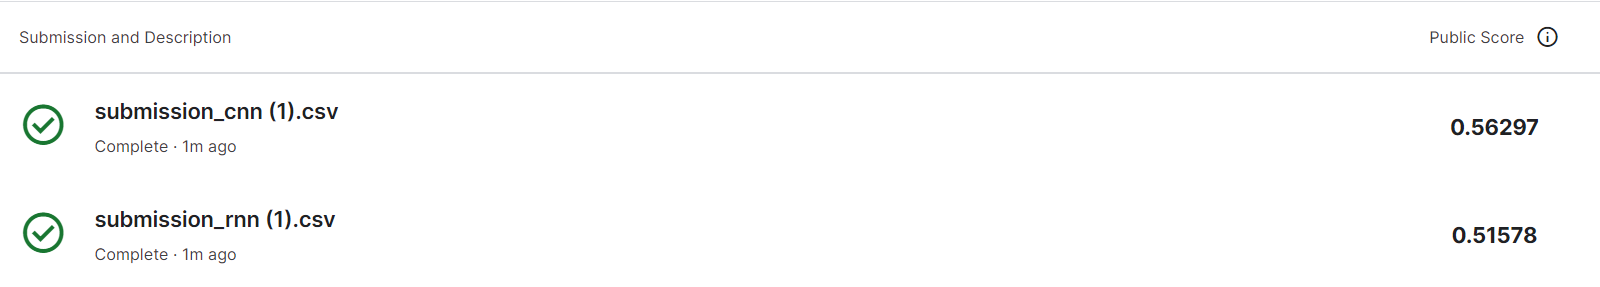

### 6 Visualizations
#### 6.1 Bar Plot of CNN Model

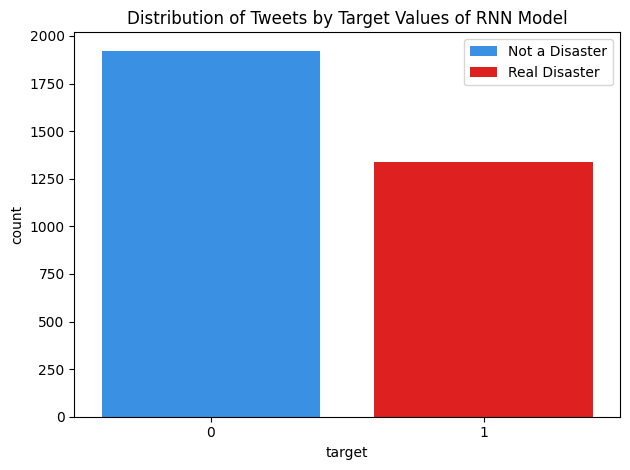

In [112]:
# create count plot to demonstrate structure of the tweets train dataset
# use sns to plot count plot
sns.countplot(x = "target", hue = "target", 
              data = rnn_sub, 
              palette = ["dodgerblue", "r"],
              dodge = False) # center the bars
plt.title(f"Distribution of Tweets by Target Values of RNN Model")
plt.legend(["Not a Disaster", "Real Disaster"])
plt.tight_layout()
plt.show()

#### 6.2 Bar Plot of RNN Model

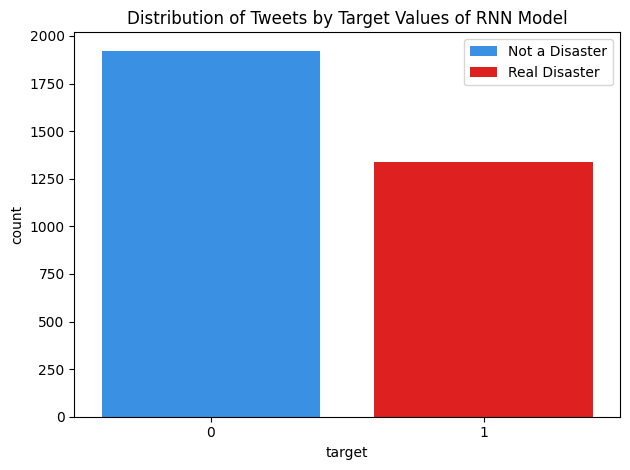

In [113]:
# create count plot to demonstrate structure of the tweets train dataset
# use sns to plot count plot
sns.countplot(x = "target", hue = "target", 
              data = rnn_sub, 
              palette = ["dodgerblue", "r"],
              dodge = False) # center the bars
plt.title(f"Distribution of Tweets by Target Values of RNN Model")
plt.legend(["Not a Disaster", "Real Disaster"])
plt.tight_layout()
plt.show()

**Observations** There was no significant change, in terms of the relationship of the data; however it is likely that in both models, there are many misclassifications, even if the distribution came out similarly to what was expected from the original train data.

### 6 Results

#### 6.1 Overview of Results

After creating a both the RNN and CNN model, it was evident that both model approaches that were taken here did not work favorably with this data. This could be seen from the validation vs train data plots, as well as the kaggle submission. Although the scores came out for both models as above a score of 0.5, it is not justfied to say twitter Real Natural Disaster tweet detection cannot be found using either the CNN or RNN models. In the CNN plots, it is evident the model is more likely overfitted, causing a lot of noise, which makes the model unable to optimize it self properly. As for RNN, the plot determines that it cannot learn properly, ecen on training data. This implies that RNN is not an ideal model to use or needs a lot of work.

#### 6.2 Discussion
Given the results portrayed in the project, it is evident that  the Sequential CNN Model Architecture was better than the RNN Model Architecture; despite RNN being a deep learning language model. Nonetheless, even with a slightly better restult, both RNN and CNN model were mediocre and require more work and adjustments. 

#### 6.3 Things to Improve
Given the state of everything, it is possible that the number of  the convulation layers and LSTM may impact the efficiency of the model. Given there were only two of each in either model, it might be something to consider. For RNN especially, given the model could not even learn on training data, it means it cannot be used with this data, or it is too simple. Therefore, it might actually need more LSTM layers. As for convulution, there was a bit of overfitting possibly being detected, so there is a chance this model may need to readjust hyperparameters more to improve it. As for RNN, more hyper parameter adjustments and testing will be another option, aside from picking a different model entirely.

### 7 Closing

#### 7.1 Conclusion
Overall, based on the model analysis, the RNN and CNN models are not sufficent to conduct proper detection of real disasters; however they both have potential. They may need more adjustments in hyperparameters and in layers, but overall, they did somewhat predict.

#### 7.2 Sources
**7.2.1: Citations**

Addison Howard, devrishi, Phil Culliton, Yufeng Guo. (2019). Natural Language Processing with Disaster Tweets. Kaggle. https://kaggle.com/competitions/nlp-getting-started

#### 7.3 Github 
**Github Link** | https://github.com/kpnguyenco/NLP-Disaster-Tweets